<a href="https://colab.research.google.com/github/mckolu/DataScience/blob/main/2_DataScienceNotes_ML_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics

In [37]:
# Tesla T4
# !nvidia-smi
!nvidia-smi -L

# https://www.youtube.com/watch?v=8jazNUpO3lQ&list=PLeo1K3hjS3us_ELKYSj_Fth2tIEkdKXvV&index=41
# https://github.com/codebasics/py/blob/master/ML/1_linear_reg/1_linear_regression.ipynb

GPU 0: Tesla T4 (UUID: GPU-995832d6-fe39-5a75-deac-3806e14464b1)


In [38]:
import pandas as pd 

student_data = [
    {'name': 'late kalas', 'grade': 2, 'major': 'CS' },
    {'name': 'kate nope', 'grade': 1, 'major': 'science' },
    {'name': 'mate hmm', 'grade': 3, 'major': 'social' },
]

df = pd.DataFrame(data=student_data, columns=['name','grade','major'])

df[['name','major']][df['grade']==df['grade'].max()]


,name,major
2,mate hmm,social


# Linear Regression

* Modeling the relationship as a linear equation through recomputing the weights for each feature. 
* Find the relationship between dependent and independent variables. **y = mx+b** m is the coefficient (slope, gradient) and b is the intercept.


Text(0, 0.5, 'price $US')

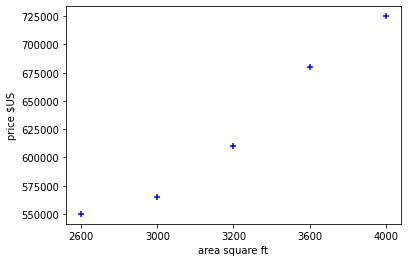

In [39]:
# Create/Import Data and Visualize

homeprices = [
    {'area': '2600', 'price': 550000},
    {'area': '3000', 'price': 565000},
    {'area': '3200', 'price': 610000},
    {'area': '3600', 'price': 680000},
    {'area': '4000', 'price': 725000}
]

df = pd.DataFrame(data=homeprices, columns=['area','price'])

import matplotlib.pyplot as plt
plt.scatter(df['area'], df['price'], color='blue', marker='+')
plt.xlabel('area square ft')
plt.ylabel('price $US')

* Steps: Square the individual errors, sum them up, and try to minimize the error by taking the derivative of the error iteratively.
* INPUT (independent variables) needs to be 2D (df[[''area]]) and the dependent variable needs to be 1D (df['price']). Predict needs to be the same shape as the input.
* reg.coef_ and reg.intercept_ provide coefficient adn the intercept of the model


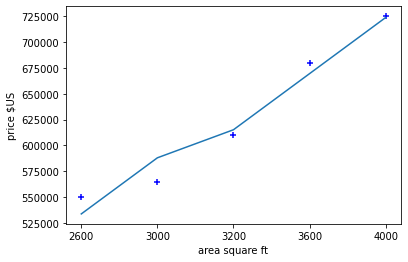

In [150]:
from sklearn import linear_model

lin_reg = linear_model.LinearRegression()

area = df[['area']].values
price = df['price']

lin_reg.fit(area, price)
# reg.coef_
# reg.intercept_

lin_reg.predict([[3300]])


plt.xlabel('area square ft')
plt.ylabel('price $US')
plt.scatter(df['area'], df['price'], color='blue', marker='+')

In [65]:
# Exercise
data = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv')

lin = linear_model.LinearRegression()

X = data.iloc[:,0:1]
y = data.iloc[:,-1]

lin.fit(X,y)
lin.predict([[2020]])



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([41288.69409442])

# Multivariate Linear Regression

In [96]:
# The same idea

df2 = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/homeprices.csv')

df2.bedrooms = df2.bedrooms.fillna(df2.bedrooms.median())

X = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

mv_lin = linear_model.LinearRegression()

mv_lin.fit(X,y)

# mv_lin.coef_
# mv_lin.intercept_

mv_lin.predict([[3000,3,40]]) # 498408.25158031
# mv_lin.predict([[2500,4,5]]) # 578876.03748933


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([498408.25158031])

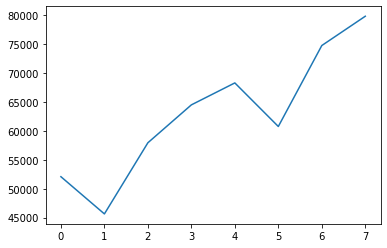

In [168]:
# Exercise:

df3 = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv')

# Pre-processing
df3['test_score(out of 10)'] = df3['test_score(out of 10)'].fillna(math.floor(df3['test_score(out of 10)'].mean()))

df3['experience'] = df3['experience'].fillna('zero')

# !pip install word2number
from word2number import w2n
df3['experience'] = df3['experience'].apply(w2n.word_to_num)

df3

X = (df3.iloc[:,:-1])
X
y = df3.iloc[:,-1]

mv2_lin = linear_model.LinearRegression()

mv2_lin.fit(X,y)

mv2_lin.predict(X) 

# mv2_lin.predict([[12,10,10]]) 


